<a href="https://colab.research.google.com/github/jac7az/data-engineering-essentials/blob/main/DuckDB_Parquet_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Pipeline Challenge: Create a pipeline that reads multiple CSV files, cleans the data, and outputs optimized Parquet files

In [63]:
import numpy as np
import pandas as pd
import duckdb
import matplotlib.pyplot as plt

np.random.seed(42)

In [50]:
wish_data={
    'version':np.round(np.random.uniform(1.0,6.0,43),1),
    'weapon_type':np.random.choice(['Sword','Claymore','Bow','Catalyst','Polearm'],43),
    'element': np.random.choice(['Hydro','Cryo','Anemo','Geo','Electro','Dendro','Pyro'],43),
    'wishes':np.random.randint(1,181,43),
    'weapon': np.random.choice(['Yes','No'],43)
}

wish_df=pd.DataFrame(wish_data)
wish_df.to_csv('wish.csv',index=False)

In [51]:
jade_data={
    'version':np.round(np.random.uniform(1.0,6.0,43),1),
    'path':np.random.choice(['Preservation','Elation','Hunt','Abundance','Rememberance','Destruction','Harmony','Nihility'],43),
    'element':np.random.choice(['Lightning','Quantum','Imaginary','Ice','Physical','Wind','Fire'],43),
    'tickets':np.random.randint(1,181,43),
    'lightcone':np.random.choice(['Yes','No'],43)
}
jade_df=pd.DataFrame(jade_data)
jade_df.to_csv('jade.csv',index=False)

In [23]:
conn=duckdb.connect()
conn.execute("SELECT * FROM wish_df").fetchall()

[(4.1, 'Catalyst', 'Electro', 113, 'Yes'),
 (1.4, 'Sword', 'Anemo', 13, 'Yes'),
 (1.3, 'Polearm', 'Cryo', 23, 'Yes'),
 (3.7, 'Claymore', 'Anemo', 99, 'Yes'),
 (3.7, 'Claymore', 'Pyro', 105, 'Yes'),
 (4.2, 'Polearm', 'Hydro', 30, 'Yes'),
 (4.6, 'Catalyst', 'Cryo', 17, 'No'),
 (5.9, 'Claymore', 'Electro', 113, 'Yes'),
 (3.6, 'Catalyst', 'Cryo', 62, 'No'),
 (2.6, 'Claymore', 'Cryo', 84, 'Yes'),
 (5.0, 'Claymore', 'Cryo', 112, 'No'),
 (2.4, 'Bow', 'Dendro', 86, 'No'),
 (3.2, 'Claymore', 'Cryo', 141, 'No'),
 (1.4, 'Sword', 'Anemo', 19, 'Yes'),
 (1.1, 'Polearm', 'Hydro', 177, 'Yes'),
 (5.8, 'Polearm', 'Pyro', 100, 'No'),
 (5.2, 'Catalyst', 'Geo', 140, 'Yes'),
 (4.5, 'Claymore', 'Cryo', 147, 'No'),
 (3.0, 'Sword', 'Electro', 76, 'Yes'),
 (1.9, 'Catalyst', 'Cryo', 9, 'No'),
 (1.8, 'Bow', 'Electro', 28, 'No'),
 (2.3, 'Catalyst', 'Anemo', 128, 'Yes'),
 (3.7, 'Catalyst', 'Electro', 52, 'No'),
 (4.6, 'Claymore', 'Geo', 83, 'Yes'),
 (4.3, 'Bow', 'Hydro', 111, 'No'),
 (2.4, 'Catalyst', 'Electro', 14

In [52]:
result=conn.execute("""
SELECT
version,
element,
weapon_type,
wishes
FROM wish.csv
GROUP BY version,element,weapon_type,wishes
ORDER BY version
""").fetchall()

for row in result:
  print(row)

(1.0, 'Anemo', 'Catalyst', 17)
(1.2, 'Geo', 'Sword', 10)
(1.2, 'Dendro', 'Bow', 76)
(1.3, 'Geo', 'Polearm', 178)
(1.4, 'Geo', 'Claymore', 143)
(1.5, 'Dendro', 'Sword', 130)
(1.5, 'Anemo', 'Polearm', 64)
(1.6, 'Dendro', 'Catalyst', 130)
(1.7, 'Hydro', 'Sword', 78)
(1.7, 'Geo', 'Sword', 117)
(1.8, 'Anemo', 'Claymore', 101)
(2.1, 'Cryo', 'Sword', 3)
(2.2, 'Geo', 'Claymore', 95)
(2.6, 'Anemo', 'Bow', 168)
(2.7, 'Geo', 'Claymore', 134)
(2.7, 'Anemo', 'Catalyst', 178)
(2.7, 'Dendro', 'Claymore', 13)
(2.8, 'Dendro', 'Catalyst', 138)
(2.8, 'Electro', 'Bow', 1)
(2.9, 'Cryo', 'Sword', 73)
(3.0, 'Dendro', 'Bow', 40)
(3.4, 'Hydro', 'Polearm', 84)
(3.6, 'Pyro', 'Catalyst', 63)
(3.7, 'Pyro', 'Sword', 5)
(3.7, 'Dendro', 'Polearm', 151)
(3.7, 'Geo', 'Bow', 69)
(3.7, 'Cryo', 'Catalyst', 163)
(4.0, 'Electro', 'Sword', 152)
(4.0, 'Dendro', 'Claymore', 77)
(4.4, 'Cryo', 'Claymore', 65)
(4.4, 'Pyro', 'Polearm', 120)
(4.6, 'Hydro', 'Polearm', 62)
(4.7, 'Pyro', 'Catalyst', 150)
(4.7, 'Cryo', 'Catalyst', 162)

In [56]:
join_query="""
SELECT
  j.version,
  j.element,
  j.path,
  j.tickets,
  w.element,
  w.weapon,
  w.wishes
FROM wish.csv w
JOIN jade.csv j ON w.version=j.version
ORDER BY w.version
"""

pulls_df=conn.execute(join_query).fetchdf()
pulls_df.to_csv('pulls.csv',index=False)

In [57]:
conn.execute("""
COPY (SELECT * FROM 'pulls.csv')
TO 'pulls.parquet' (FORMAT PARQUET)
""")

Time Series Forecasting: Use DuckDB's window functions to create lagged features for time series analysis

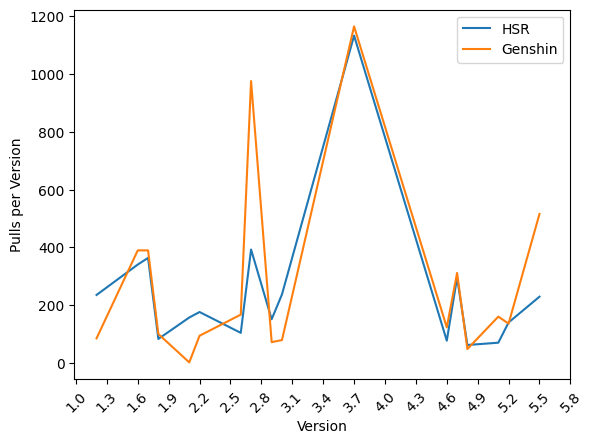

In [76]:
pulls_trend=conn.execute("""
SELECT
  version,
  SUM(tickets) as total_tickets,
  SUM(wishes) as total_wishes
FROM 'pulls.parquet'
GROUP BY version
ORDER BY version
""").fetchdf()

plt.plot(pulls_trend['version'],pulls_trend['total_tickets'],label='HSR')
plt.plot(pulls_trend['version'],pulls_trend['total_wishes'],label='Genshin')
plt.xlabel("Version")
plt.ylabel("Pulls per Version")
plt.xticks(np.arange(1,6,step=0.3),rotation=45)
plt.legend()